In [1]:
import matplotlib.pyplot as plt
import numpy as np

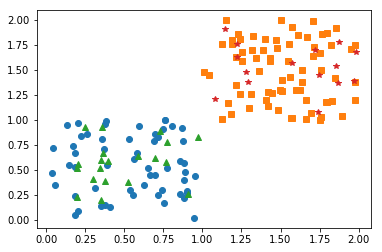

In [2]:
#Algorithm:
'''
1) Prepare Data
2) 
'''
#Config
c1_count = 56
c2_count = 72
blue_count = 20
orange_count = 15

#Problem:
c1 = np.random.rand(c1_count,2)
c2 = np.random.rand(c2_count,2)+1
blue_set = np.random.rand(blue_count,2)
orange_set = np.random.rand(orange_count,2)+1

plt.plot(c1[:,0],c1[:,1],'o')
plt.plot(c2[:,0],c2[:,1],'s')
plt.plot(blue_set[:,0],blue_set[:,1],'^')
plt.plot(orange_set[:,0],orange_set[:,1],'*')
plt.show()

In [3]:
data = np.zeros((c1_count+c2_count,3))
data[:c1_count,:-1]=c1
data[:c1_count,-1]=0.0
data[c1_count:,:-1]=c2
data[c1_count:,-1]=1.0
np.random.shuffle(data)

X = np.concatenate((np.ones((data.shape[0],1)),data[:,(0,1)]),axis=1)
Y = np.array(data[:,-1])

In [4]:
# activation function
def sigmoid(x):
    #sigmoidal activation
    a = 1.0 / (1.0 + np.exp(-1.0*x))
    return a

In [5]:
# calculate cost at w
def _calc_cost(w,x,y,m):
    # squared error
    cost = 0.5 * np.sum(np.square(sigmoid(np.dot(x,w.T)) - y))/m
    return cost
    
def _calc_gradient(w,x,y,m):
    g1 = np.sum(((sigmoid(np.dot(x,w.T)) - y)*x[:,0]))/m
    g2 = np.sum(((sigmoid(np.dot(x,w.T)) - y)*x[:,1]))/m
    g3 = np.sum(((sigmoid(np.dot(x,w.T)) - y)*x[:,2]))/m
    return (g1,g2,g3)
    

In [6]:
def calc_cost(w,x,y,m):
    hx = sigmoid(np.dot(x,w.T))
    cost = np.sum((-1.0 *y* np.log(hx)-(1-y)*np.log(1.0-hx)))/m
    return cost

def calc_gradient(w,x,y,m):
    g1 = np.sum(((sigmoid(np.dot(x,w.T)) - y)*x[:,0]))/m
    g2 = np.sum(((sigmoid(np.dot(x,w.T)) - y)*x[:,1]))/m
    g3 = np.sum(((sigmoid(np.dot(x,w.T)) - y)*x[:,2]))/m
    return (g1,g2,g3)

def classify(w,x,m):
    my_y = sigmoid(np.dot(x,w.T))
    result = np.greater(my_y,0.5)
    return np.count_nonzero(result)

In [7]:
def plotLine(w):
    c=w[0]
    a=w[1]
    b=w[2]
    print(a,b,c)
    x = np.linspace(0,2,100)
    y = -1.0*(a*x+c)/b

    plt.plot(x,y)
    plt.plot(c1[:,0],c1[:,1],'o')
    plt.plot(c2[:,0],c2[:,1],'s')
    plt.plot(blue_set[:,0],blue_set[:,1],'^')
    plt.plot(orange_set[:,0],orange_set[:,1],'*')

    plt.show()

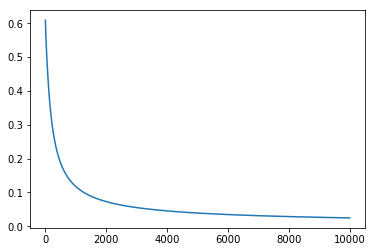

[-11.37541057   6.52865252   4.89753847] 0.0248522572595


In [8]:
no_of_input_units = 2
no_of_layers = 1
W = np.random.rand(no_of_input_units+1)
m = X.shape[0]
n = 10000
costs = np.empty(n)
alpha = 0.1

saved_w = []
for i in range(0,n):
    '''
    1) calculate cost at this value of w
    2) get the steepest gradient at this w
    3) adjust the w to get new w
    '''
    costs[i] = calc_cost(W,X,Y,m)
    grads = calc_gradient(W,X,Y,m)
    #print(costs[i],grads)
    W[0] = W[0] - alpha*grads[0]
    W[1] = W[1] - alpha*grads[1]
    W[2] = W[2] - alpha*grads[2]
    if i%200==0:
        saved_w.append(np.array([W[0],W[1],W[2]]))

y_axis = np.arange(n)
W_saved = W
plt.plot(y_axis,costs)
plt.show()
print(W_saved,costs[n-1])

In [9]:
# test on test-set
negTest = np.concatenate((np.ones((blue_set.shape[0],1)),blue_set), axis=1)
print(classify(W_saved,negTest,blue_count))
posTest = np.concatenate((np.ones((orange_set.shape[0],1)),orange_set), axis=1)
print(classify(W_saved,posTest,orange_count))
    

0
15


0.248100616949 0.59670405371 0.268381848412


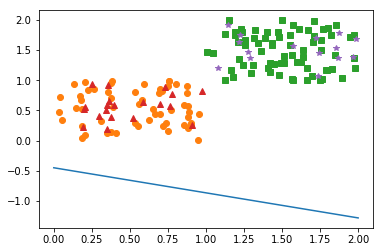

1.10834984573 1.23196262563 -1.8098737648


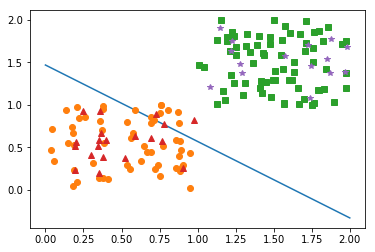

1.72100532423 1.69022594791 -2.98681944339


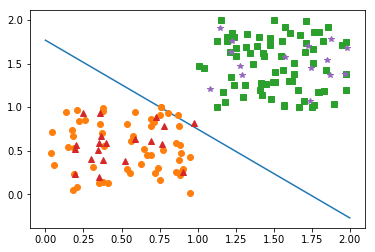

2.15862903189 2.01354614248 -3.808431333


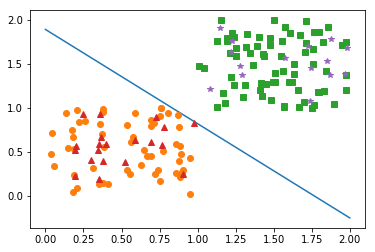

2.49957565939 2.2627744076 -4.44010769335


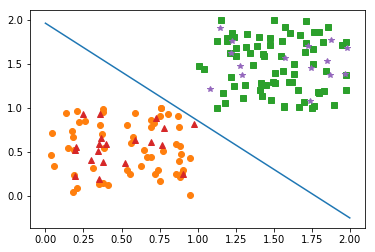

2.7800038489 2.46567204783 -4.95458892277


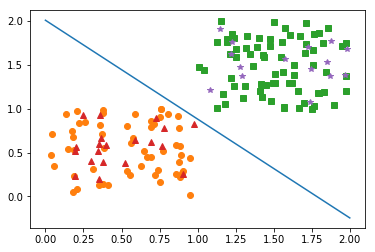

3.01908458803 2.63693827765 -5.38966580611


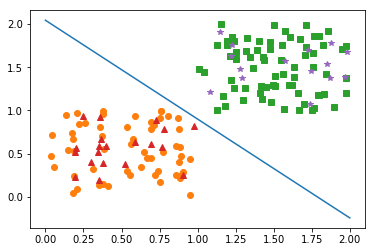

3.22811903544 2.78524731234 -5.76737627005


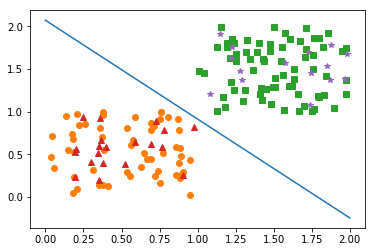

3.4143103296 2.91613487565 -6.10167232761


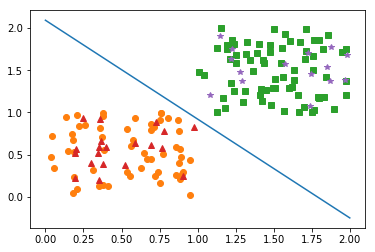

3.58252821121 3.03334659899 -6.40194155537


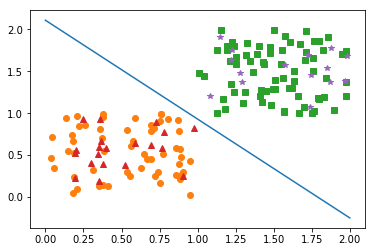

3.73621892702 3.1395340277 -6.67480301321


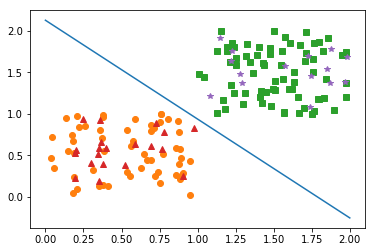

3.87791174579 3.23664279816 -6.92509979552


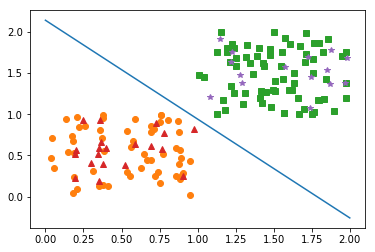

4.00951873774 3.32614284374 -7.15648349774


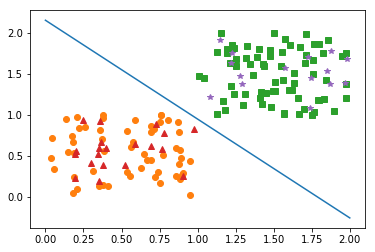

4.13252128542 3.40917188625 -7.3717764768


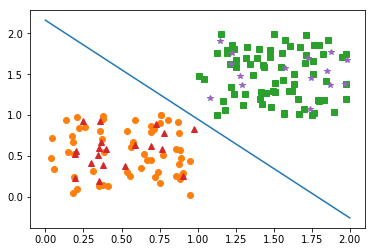

4.24809103126 3.48662863311 -7.57320607291


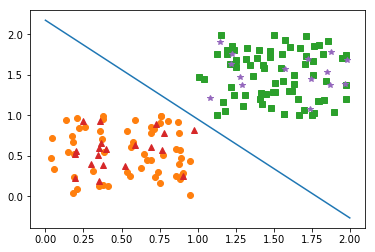

4.35717109246 3.55923543687 -7.76256150606


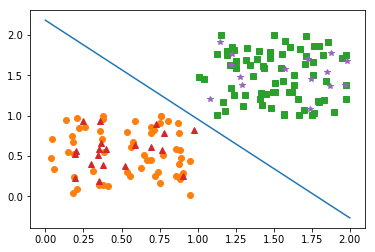

4.46053224215 3.62758168144 -7.94130218764


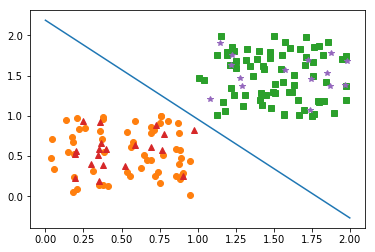

4.5588127834 3.69215459505 -8.11063445507


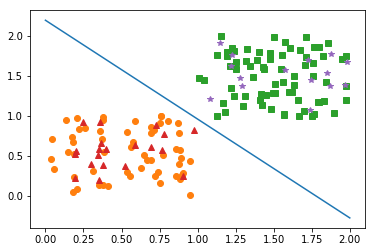

4.65254748896 3.75336162223 -8.27156717434


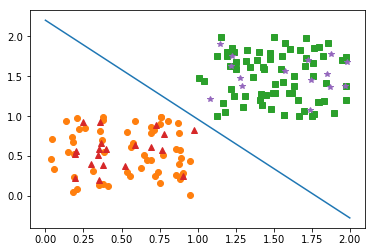

4.74218902185 3.81154698564 -8.4249528348


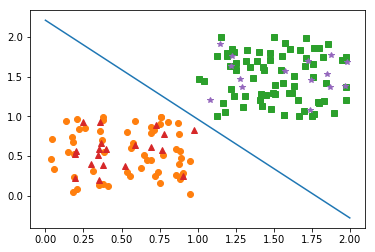

4.82812406862 3.86700415911 -8.57151845766


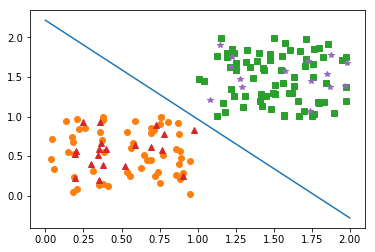

4.91068568032 3.91998540649 -8.71188920826


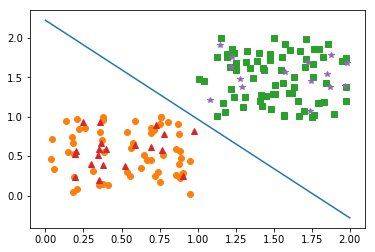

4.9901628448 3.97070917764 -8.84660668834


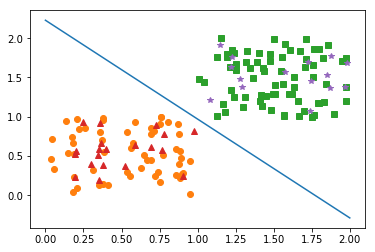

5.06680800541 4.01936591449 -8.97614328659


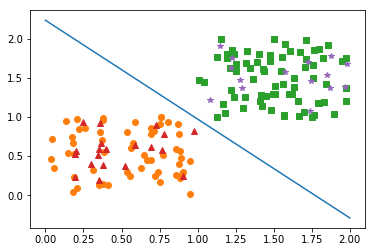

5.14084303402 4.06612266067 -9.10091356614


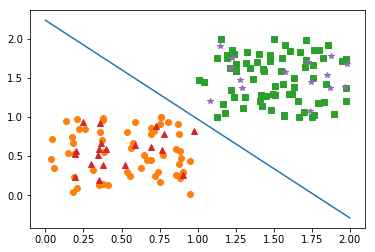

5.21246402581 4.11112675895 -9.22128339522


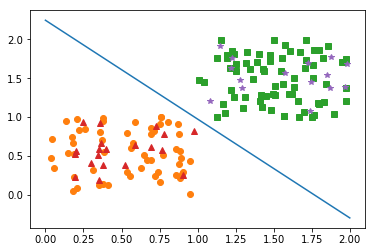

5.28184518459 4.15450884497 -9.33757733819


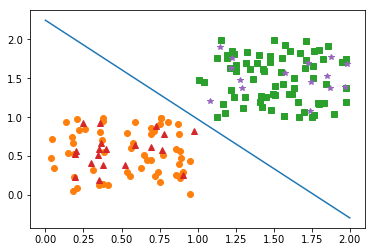

5.349141999 4.19638529223 -9.45008469075


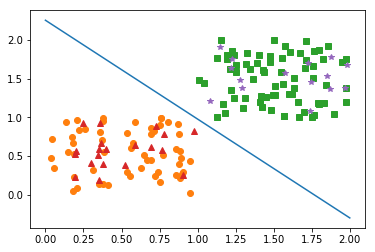

5.41449385954 4.23686022483 -9.55906444777


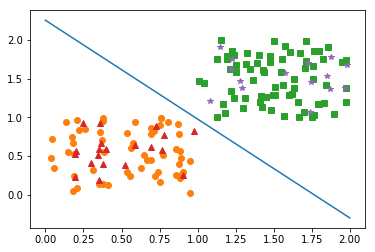

5.47802623114 4.27602718653 -9.66474942307


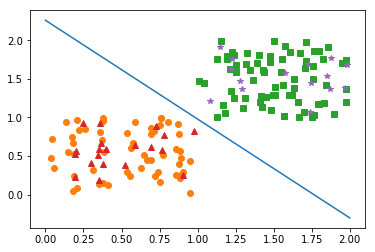

5.5398524691 4.31397053443 -9.76734968938


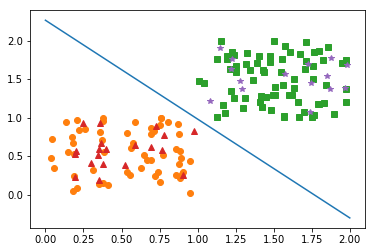

5.60007534663 4.35076660996 -9.86705546919


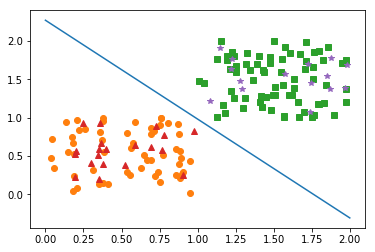

5.65878834741 4.38648472868 -9.9640395785


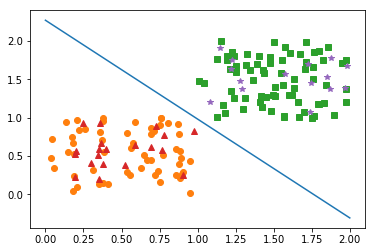

5.71607676549 4.4211880215 -10.0584595044


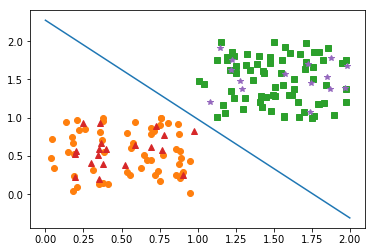

5.77201864607 4.45493415342 -10.15045918


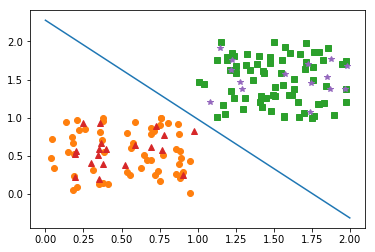

5.82668559411 4.48777594044 -10.2401705095


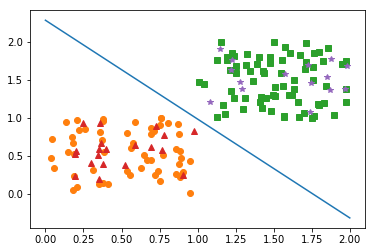

5.88014347249 4.51976188175 -10.3277146825


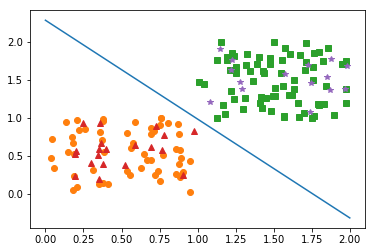

5.93245300752 4.55093662052 -10.4132033139


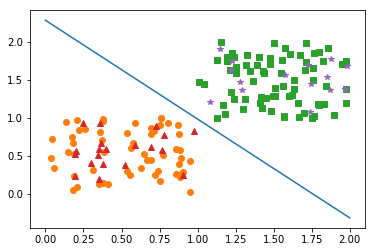

5.98367031611 4.58134134473 -10.4967394348


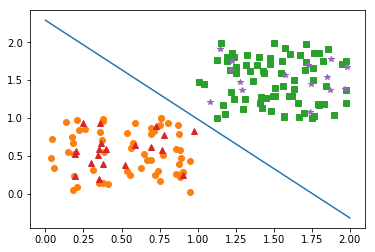

6.03384736653 4.61101413706 -10.5784183582


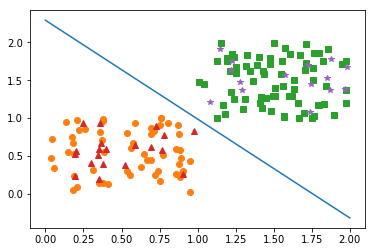

6.08303238271 4.63999028145 -10.6583284377


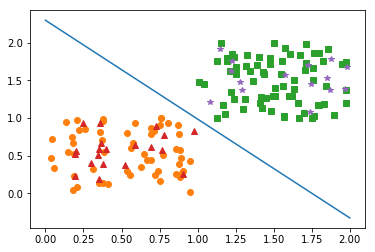

6.13127020003 4.66830253262 -10.7365517346


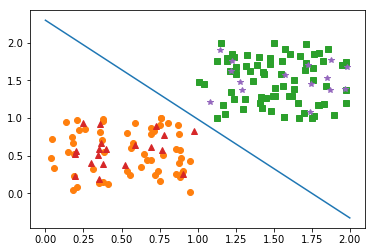

6.17860257959 4.69598135382 -10.8131646071


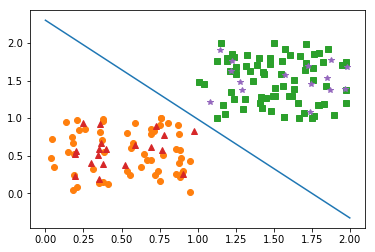

6.22506848662 4.72305512722 -10.888238231


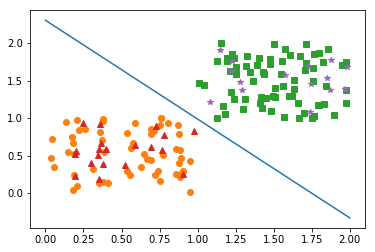

6.27070433784 4.74955034055 -10.9618390627


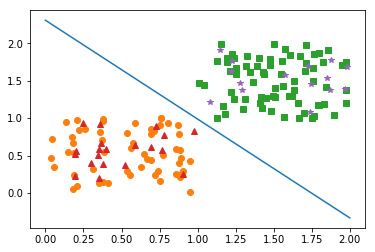

6.31554422187 4.77549175328 -11.0340292509


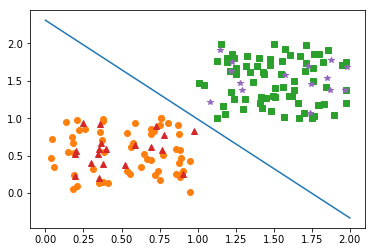

6.35962009615 4.80090254484 -11.1048670049


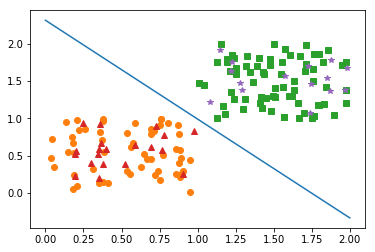

6.40296196331 4.8258044473 -11.1744069231


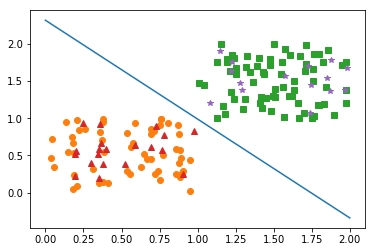

6.44559802956 4.85021786428 -11.2427002884


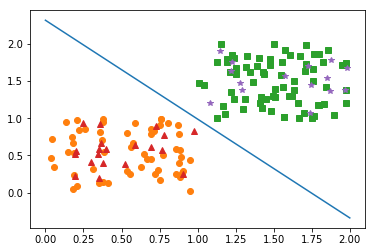

6.48755484724 4.87416197791 -11.3097953342


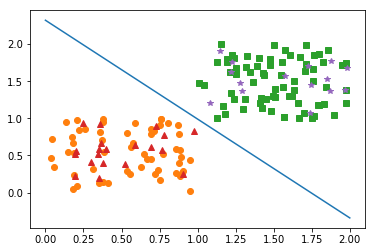

In [10]:
for x in saved_w:
    plotLine(x)

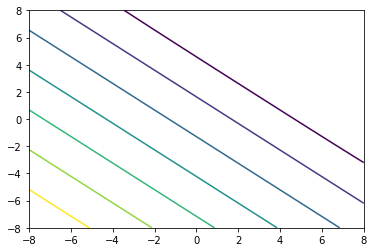

In [11]:
# not working as expected.
J_y = np.linspace(-8,8,100)
J_x = np.linspace(-8,8,100)

J_vals = np.zeros((100,100))

for j in range(0,100):
    for i in range(0,100):
        W[1] = J_y[i]
        W[2] = J_x[j]
        J_vals[i,j] = calc_cost(W,X,Y,m)
    
plt.contour(J_x,J_y,J_vals)
plt.plot(W_saved[1],W_saved[2])
plt.show()